In [1]:
""" data can be found => https://surfdrive.surf.nl/files/index.php/s/A91xgk7B5kXNvfJ """

import numpy as np, pandas as pd
import sklearn.metrics as sklm

import tensorflow as tf
keras = tf.keras
from keras import optimizers
from keras.callbacks import EarlyStopping

from featureEngineering import FeatureEngineer
from modelAsset import model, plot_loss

Engineer = FeatureEngineer("feat.npy", "path.npy", "train.csv", "test.csv")

Using TensorFlow backend.


In [2]:
#visualizing loss after each epoch
callback = EarlyStopping(monitor='val_loss', patience=3)

nns = model('rmsprop')
(X_train, y_train), (X_val, y_val), (X_test, y_test) = Engineer.splitting()

np.random.seed(37555)
history_s = nns.fit(X_train, y_train, 
                  epochs = 50, callbacks = [callback],
                  batch_size = 128,
                  validation_data = (X_val, y_val),
                  verbose = 1)

Train on 66372 samples, validate on 14223 samples
Epoch 1/50
66372/66372 [==============================] - 135s 2ms/step - loss: 2.9735 - accuracy: 0.1880 - val_loss: 2.3085 - val_accuracy: 0.4455
Epoch 2/50
66372/66372 [==============================] - 134s 2ms/step - loss: 2.0248 - accuracy: 0.4233 - val_loss: 1.3627 - val_accuracy: 0.6339
Epoch 3/50
66372/66372 [==============================] - 134s 2ms/step - loss: 1.4883 - accuracy: 0.5723 - val_loss: 1.2604 - val_accuracy: 0.6433
Epoch 4/50
66372/66372 [==============================] - 134s 2ms/step - loss: 1.1852 - accuracy: 0.6571 - val_loss: 0.8387 - val_accuracy: 0.7691
Epoch 5/50
66372/66372 [==============================] - 134s 2ms/step - loss: 0.9877 - accuracy: 0.7160 - val_loss: 0.8111 - val_accuracy: 0.7730
Epoch 6/50
66372/66372 [==============================] - 134s 2ms/step - loss: 0.8634 - accuracy: 0.7522 - val_loss: 0.5637 - val_accuracy: 0.8415
Epoch 7/50
66372/66372 [==============================] - 134s

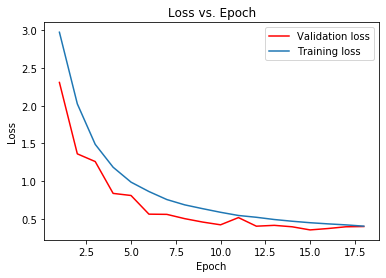

In [3]:
plot_loss(history_s)

In [4]:
_, levels = Engineer.convert_labels()
inv_levels = {}
for key, val in levels.items():
    inv_levels[val] = key

y_pred = []
y_true = []
for score in nns.predict(X_test):
    y_pred.append(inv_levels[np.argmax(score)])

for actual in y_test:
    y_true.append(inv_levels[np.argmax(actual)])

print("Accuracy: ", sklm.accuracy_score(y_true, y_pred))

Accuracy:  0.8890529424172116


In [ ]:
# remade_test = Engineer.remake_array(Engineer.test_feat)

# submit = nns.predict(remade_test)
# word_answer = []

# for score in submit:
#     word_answer.append(inv_levels[np.argmax(score)])

# df_submit = pd.DataFrame(word_answer, columns=['word'])
# df_answers = Engineer.df_test.join(df_submit, how='right')

# df_answers[['path', 'word']].to_csv("result.csv", index=False)